In [224]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv('BankNote_Authentication.csv')
data.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [225]:
data.shape

(1372, 5)

In [226]:
xtrain = data.sample(frac=0.8, random_state=0)
xtest = data.drop(xtrain.index)
ytrain = xtrain.pop('class')
ytest = xtest.pop('class')
xtrain

,variance,skewness,curtosis,entropy
1023,-1.77130,-10.766500,10.21840,-1.00430
642,5.13210,-0.031048,0.32616,1.11510
1196,-2.01490,3.687400,-1.93850,-3.89180
31,1.48840,3.627400,3.30800,0.48921
253,5.28680,3.257000,-1.37210,1.16680
...,...,...,...,...
455,2.66820,10.216000,-3.44140,-4.00690
584,0.33565,6.836900,0.69718,-0.55691
147,1.74960,-0.175900,5.18270,1.29220
160,5.04520,3.896400,-1.43040,0.86291


# Without L2

In [227]:
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.W = None
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def fit(self, x, y):
        x = np.insert(np.array(x), 0, 1, axis=1)
        self.W = np.ones(x.shape[1])
        for epoch in range(self.epochs):
            y_pred = self.sigmoid(np.dot(x, self.W))
            error = y - y_pred
            self.W += self.lr*np.dot(error,x)
            
    def predict(self, x):
        x = np.insert(np.array(x), 0, 1, axis=1)
        y_pred = self.sigmoid(np.dot(x, self.W))
        y_pred = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred
    
    def accuracy(self, y, y_pred):
        return (1 - np.sum(np.abs(y - y_pred))/len(y)) * 100

In [228]:
model1 = LogisticRegression()
model1.fit(xtrain, ytrain)
y_pred = model1.predict(xtest)
print(model1.accuracy(ytest, y_pred))

98.90510948905109


# L2 Regularization

In [229]:
class LogisticRegression_L2Regularization:
    def __init__(self, lr=0.01, epochs=100, lambda_val=0.01):
        self.lr = lr
        self.epochs = epochs
        self.W = None
        self.lambda_val = lambda_val
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def fit(self, x, y):
        x = np.insert(np.array(x), 0, 1, axis=1)
        self.W = np.ones(x.shape[1])
        for epoch in range(self.epochs):
            y_pred = self.sigmoid(np.dot(x, self.W))
            error = y - y_pred
            self.W += self.lr*(np.dot(error,x) - self.lambda_val*self.W)
            
    def predict(self, x):
        x = np.insert(np.array(x), 0, 1, axis=1)
        y_pred = self.sigmoid(np.dot(x, self.W))
        y_pred = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred
    
    def accuracy(self, y, y_pred):
        return (1 - np.sum(np.abs(y - y_pred))/len(y)) * 100  

In [230]:
model2 = LogisticRegression_L2Regularization(lambda_val=0.1)
model2.fit(xtrain, ytrain)
y_pred = model2.predict(xtest)
print(model2.accuracy(ytest, y_pred))

97.44525547445255


# Plots

### Observation
As λ increases, the regularization term's impact becomes stronger. Initially, the model benefits from slight regularization (λ from 0.0 to 0.75), but beyond a certain threshold (𝜆~0.8), the regularization is too strong, causing the weights to shrink excessively and degrade the model's performance.

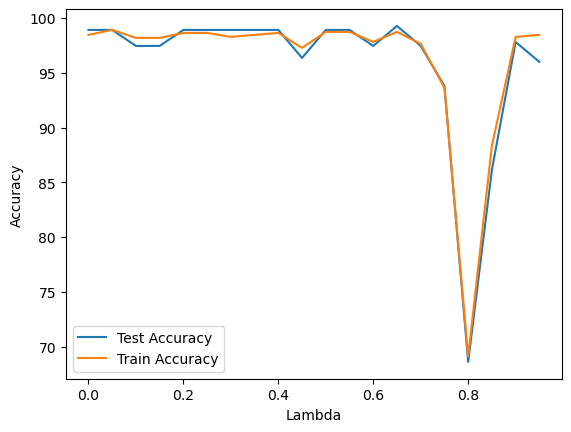

In [231]:
ytest_lambda = []
ytrain_lambda = []

for i in np.arange(0,1,0.05):
    model3 = LogisticRegression_L2Regularization(lambda_val=i)
    model3.fit(xtrain, ytrain)
    y_pred = model3.predict(xtest)
    ytest_lambda.append(model3.accuracy(ytest, y_pred))
    y_pred = model3.predict(xtrain)
    ytrain_lambda.append(model3.accuracy(ytrain, y_pred))
    

plt.plot(np.arange(0,1,0.05), ytest_lambda, label='Test Accuracy')
plt.plot(np.arange(0,1,0.05), ytrain_lambda, label='Train Accuracy')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3d plot of important features

In [232]:
model2.W

array([ 11.51478683, -16.81572918, -10.14372871, -10.50142876,
        -2.70684026])

## Negative impact features

In [233]:
import plotly.express as px
px.scatter_3d(data, x='variance', y='skewness', z='curtosis', color='class')

## Positive Impact Features

In [234]:
px.scatter_3d(data, x='skewness', y='curtosis', z='entropy', color='class')

## Creating Outliers
### Note:
I have used chat gpt to understand how to add outliers to the given data

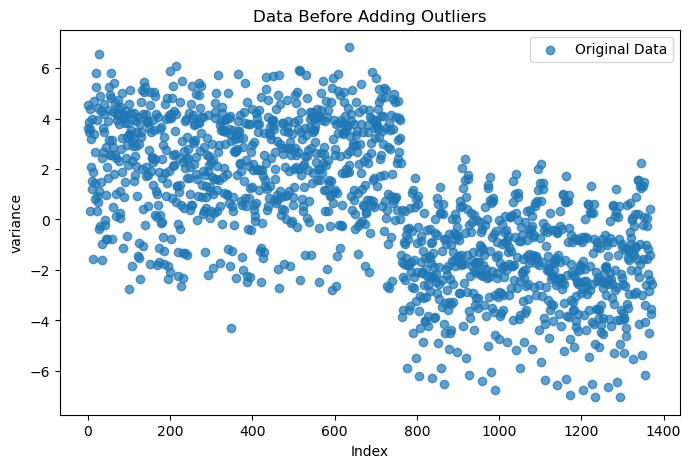

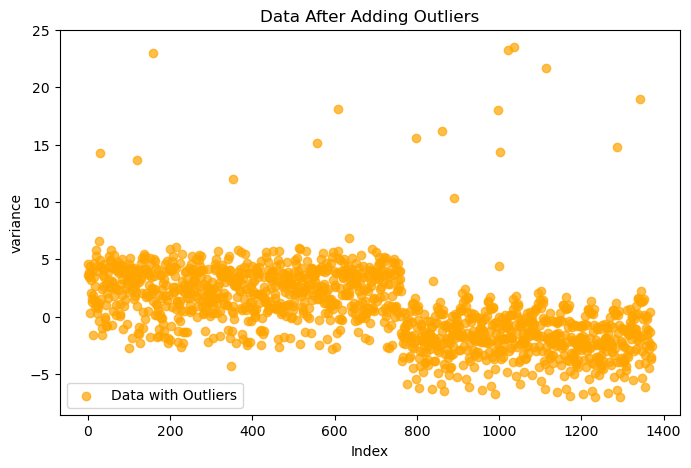

In [235]:
# Choose a feature column to add outliers
feature_column = 'variance'  # Example: use the 'variance' column (change as needed)

# Plot the original feature data
plt.figure(figsize=(8, 5))
plt.scatter(range(len(data)), data[feature_column], label='Original Data', alpha=0.7)
plt.title('Data Before Adding Outliers')
plt.xlabel('Index')
plt.ylabel(feature_column)
plt.legend()
plt.show()

# Add outliers to the chosen feature column
num_outliers = 20
outliers_indices = np.random.choice(data.index, num_outliers, replace=False)
mean_value = data[feature_column].mean()
std_dev = data[feature_column].std()

# Adding extreme positive outliers
data.loc[outliers_indices, feature_column] = mean_value + np.random.normal(5 * std_dev, 2 * std_dev, num_outliers)

# Plot the data with outliers
plt.figure(figsize=(8, 5))
plt.scatter(range(len(data)), data[feature_column], color='orange', label='Data with Outliers', alpha=0.7)
plt.title('Data After Adding Outliers')
plt.xlabel('Index')
plt.ylabel(feature_column)
plt.legend()
plt.show()


In [236]:
data.shape

(1372, 5)

In [237]:
xtrain = data.sample(frac=0.8, random_state=0)
xtest = data.drop(xtrain.index)
ytrain = xtrain.pop('class')
ytest = xtest.pop('class')

### Observation
On adding the outliers to the data, decrease in accuracy can be seen

In [238]:
model = LogisticRegression_L2Regularization()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(model.accuracy(ytest, y_pred))

78.46715328467153
